## What are the minimum steps to map a shapefile?
This program maps a shapefile using folium. The steps that follow should be the minimum steps to see the shapefile in the notebook file.

In [1]:
import math as math
import os   # For saving output to path
import sys  # For checking version of python for replication
import pandas as pd
import numpy as np
import geopandas as gpd
import shapely
import folium as fm # folium has more dynamic maps - but requires internet connection

In [2]:
# Display versions being used - important information for replication

print("Python Version     ", sys.version)
print("pandas version:    ", pd.__version__)
print("numpy version:     ", np.__version__)
print("geopandas version: ", gpd.__version__)
print("shapely version:   ", shapely.__version__)
print("folium version:    ", fm.__version__)

Python Version      3.10.13 | packaged by conda-forge | (main, Dec 23 2023, 15:27:34) [MSC v.1937 64 bit (AMD64)]
pandas version:     2.2.0
numpy version:      1.26.4
geopandas version:  0.14.3
shapely version:    2.0.2
folium version:     0.15.1


In [3]:
# Where is the shapefile located?
# In this example the data is on www2.census.gov and the file is a zipped shapefile
shpfile_location = 'https://www2.census.gov/geo/tiger/TIGER2020/BG/tl_2020_11_bg.zip'
# Read the shapefile into a geopandas dataframe (gdf)
gdf = gpd.read_file(shpfile_location)

In [4]:
gdf.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,11,001,010800,1,110010108001,Block Group 1,G5030,S,112810,0,+38.9005669,-077.0474728,"POLYGON ((-77.05014 38.90033, -77.05013 38.900..."
1,11,001,010900,2,110010109002,Block Group 2,G5030,S,2270174,2933566,+38.8132364,-077.0238475,"POLYGON ((-77.03919 38.80050, -77.03913 38.800..."
2,11,001,007401,1,110010074011,Block Group 1,G5030,S,1029053,200980,+38.8668098,-076.9949201,"POLYGON ((-77.00540 38.86879, -77.00341 38.870..."
3,11,001,007403,1,110010074031,Block Group 1,G5030,S,126738,0,+38.8481009,-076.9774095,"POLYGON ((-76.98127 38.84662, -76.98098 38.846..."
4,11,001,007404,1,110010074041,Block Group 1,G5030,S,360630,0,+38.8514546,-076.9784997,"POLYGON ((-76.98334 38.85337, -76.98277 38.853..."


In [5]:
# Check the coordinate reference system (crs) of the shapefile
gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

Text(0.5, 1.0, 'NAD83 (lat/lon)')

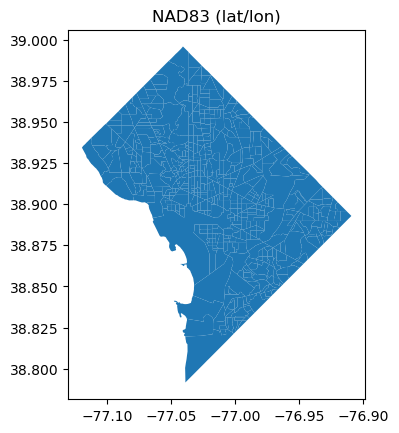

In [6]:
# Plot the geopandas dataframe
ax = gdf.plot()
ax.set_title("NAD83 (lat/lon)")

Text(0.5, 1.0, 'NAD 1983 Albers contiguous USA')

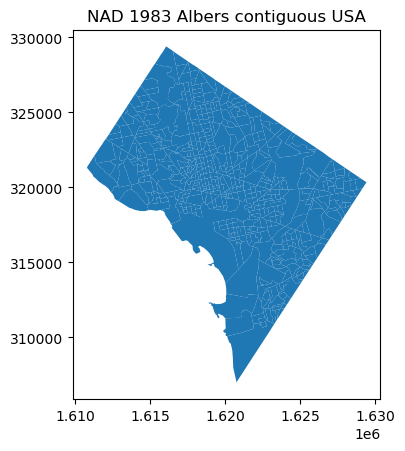

In [7]:
gdf_crs102003 = gdf.to_crs("ESRI:102003")
ax = gdf_crs102003.plot()
ax.set_title("NAD 1983 Albers contiguous USA")

Text(0.5, 1.0, 'WGS 84 (lat/lon)')

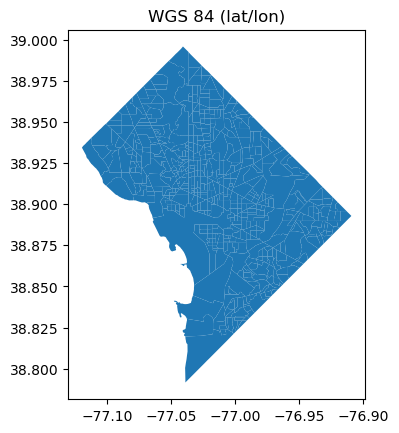

In [8]:
# CRS for folium needs to match Google Earth and Open Street Map. Which is EPSG:4326 - wgs84 in lat lon coordinates.
gdf_crs4326 = gdf.to_crs("EPSG:4326")
ax = gdf_crs4326.plot()
ax.set_title("WGS 84 (lat/lon)")

For details on other CRS options:

https://spatialreference.org/ref/epsg/4269/

## Select one county to map
The original datafile has all counties, we just want to map one county.

In [9]:
# list all unique values in the column COUNTYFP
county_list = gdf['COUNTYFP'].unique()
county_list

array(['001'], dtype=object)

In [10]:
# Create a new variable to flag observations in county
# countyselect = ["086"]
# select first county in the list
countyselect = [county_list[0]]
gdf['CountySelect'] = np.where(gdf['COUNTYFP'].isin(countyselect),1,0)
pd.crosstab(index=gdf['CountySelect'], columns="count")

col_0,count
CountySelect,
1,571


In [11]:
gdf_countyselect = gdf[gdf['CountySelect'] == 1]
gdf_countyselect.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,CountySelect
0,11,001,010800,1,110010108001,Block Group 1,G5030,S,112810,0,+38.9005669,-077.0474728,"POLYGON ((-77.05014 38.90033, -77.05013 38.900...",1
1,11,001,010900,2,110010109002,Block Group 2,G5030,S,2270174,2933566,+38.8132364,-077.0238475,"POLYGON ((-77.03919 38.80050, -77.03913 38.800...",1
2,11,001,007401,1,110010074011,Block Group 1,G5030,S,1029053,200980,+38.8668098,-076.9949201,"POLYGON ((-77.00540 38.86879, -77.00341 38.870...",1
3,11,001,007403,1,110010074031,Block Group 1,G5030,S,126738,0,+38.8481009,-076.9774095,"POLYGON ((-76.98127 38.84662, -76.98098 38.846...",1
4,11,001,007404,1,110010074041,Block Group 1,G5030,S,360630,0,+38.8514546,-076.9784997,"POLYGON ((-76.98334 38.85337, -76.98277 38.853...",1


### Map the data
The follium package allows for interactive maps to be generated. The commands below illustrate how two layers can be mapped in one interactive html file. The html file is saved and can be open in a webbrowser.

Follium provides the tools to make interactive webmaps. Helpful guidance has been found at:
- https://python-visualization.github.io/folium/modules.html
- https://python-visualization.github.io/folium/quickstart.html
- https://ocefpaf.github.io/python4oceanographers/blog/2015/12/14/geopandas_folium/

In [12]:
# What location should the map be centered on?
center_x = gdf_countyselect.bounds.minx.mean()
center_y = gdf_countyselect.bounds.miny.mean()
center_x, center_y

(-77.01761192469351, 38.90607000175131)

In [13]:
map = fm.Map(location=[center_y,center_x], zoom_start=10, crs='EPSG3857')
map

In [14]:
# add the geopandas dataframe to the map
fm.GeoJson(gdf_countyselect).add_to(map)
map

## Save map as an html file
Jupyter notebook has an issue mapping large files. The above step saves the map as an html file. The next block of code displays the saved map.

In [15]:
map_save_file = 'map.html'
map.save(map_save_file)